In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [2]:
# Chargement des datasets
df = pd.read_csv("../data/transactions.csv")
df_ml = pd.read_csv("../data/dataset_ml.csv")

In [3]:
# Taille des datasets
print("Transactions :", df.shape)
print("Dataset ML :", df_ml.shape)

Transactions : (3171342, 7)
Dataset ML : (88500, 11)


In [4]:
# Visualisation df
df.head()

,type,cat,montant,marchand,date,user_id,mois
0,credit,Salaire,2025.000000,Employeur,2020-01-01,1,2020-01-01
1,debit,Shopping,50.620000,H&M,2020-01-01,1,2020-01-01
2,debit,Loisirs,44.060000,Netflix,2020-01-01,1,2020-01-01
3,debit,Logement,605.000000,Loyer,2020-01-04,1,2020-01-01
4,debit,Alimentation,300.905354,Super U,2020-01-04,1,2020-01-01


In [5]:
# Visualisation df_ml
df_ml.head()

,user_id,mois,depense_totale,depense_prev,target,profil,salaire,loyer,nb_enfants,tier_conso,conso_factor
0,1,2020-02-01,2583.554464,2548.787804,2280.959964,Famille Modeste,2025,605,3,Standard,1.9
1,1,2020-03-01,2280.959964,2583.554464,2227.944459,Famille Modeste,2025,605,3,Standard,1.9
2,1,2020-04-01,2227.944459,2280.959964,2315.965943,Famille Modeste,2025,605,3,Standard,1.9
3,1,2020-05-01,2315.965943,2227.944459,2406.175426,Famille Modeste,2025,605,3,Standard,1.9
4,1,2020-06-01,2406.175426,2315.965943,2402.397344,Famille Modeste,2025,605,3,Standard,1.9


In [6]:
# Aperçu de la structure
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88500 entries, 0 to 88499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         88500 non-null  int64  
 1   mois            88500 non-null  object 
 2   depense_totale  88500 non-null  float64
 3   depense_prev    88500 non-null  float64
 4   target          88500 non-null  float64
 5   profil          88500 non-null  object 
 6   salaire         88500 non-null  int64  
 7   loyer           88500 non-null  int64  
 8   nb_enfants      88500 non-null  int64  
 9   tier_conso      88500 non-null  object 
 10  conso_factor    88500 non-null  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 7.4+ MB


In [7]:
# Vérification valeurs manquantes
df_ml.isnull().sum()

user_id           0
mois              0
depense_totale    0
depense_prev      0
target            0
profil            0
salaire           0
loyer             0
nb_enfants        0
tier_conso        0
conso_factor      0
dtype: int64

In [9]:
# Stats descriptives
df_ml.describe()

,user_id,depense_totale,depense_prev,target,salaire,loyer,nb_enfants,conso_factor
count,88500.000000,88500.000000,88500.000000,88500.000000,88500.000000,88500.000000,88500.00000,88500.000000
mean,750.500000,2571.229232,2574.738034,2569.824578,2828.671333,990.734000,0.99600,1.298800
std,433.015052,1231.474601,1232.454336,1230.659551,1595.274576,592.303628,1.37016,0.411048
min,1.000000,327.450000,327.450000,327.450000,806.000000,212.000000,0.00000,1.000000
25%,375.750000,1697.367500,1698.677500,1698.367500,1834.750000,604.000000,0.00000,1.000000
50%,750.500000,2264.790000,2266.500000,2264.105000,2279.500000,801.000000,0.00000,1.000000
75%,1125.250000,3125.688135,3132.255255,3123.072500,3559.750000,1240.250000,2.00000,1.600000
max,1500.000000,9048.328483,9048.328483,9048.328483,7906.000000,3460.000000,4.00000,2.200000


### Nombre de mois par utilisateur

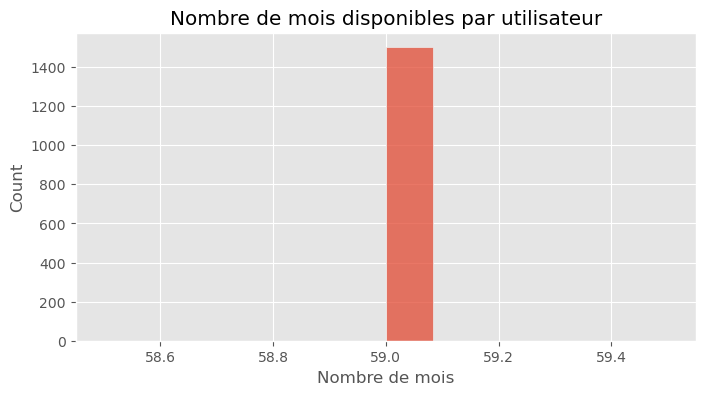

Moyenne de mois par utilisateur : 59.0
Min : 59 Max : 59


In [10]:
# Nombre de mois par utilisateur
mois_par_user = df_ml.groupby("user_id")["mois"].nunique()

plt.figure(figsize=(8,4))
sns.histplot(mois_par_user, bins=12)
plt.title("Nombre de mois disponibles par utilisateur")
plt.xlabel("Nombre de mois")
plt.show()

print("Moyenne de mois par utilisateur :", mois_par_user.mean())
print("Min :", mois_par_user.min(), "Max :", mois_par_user.max())

#### Distribution des dépenses mensuelles

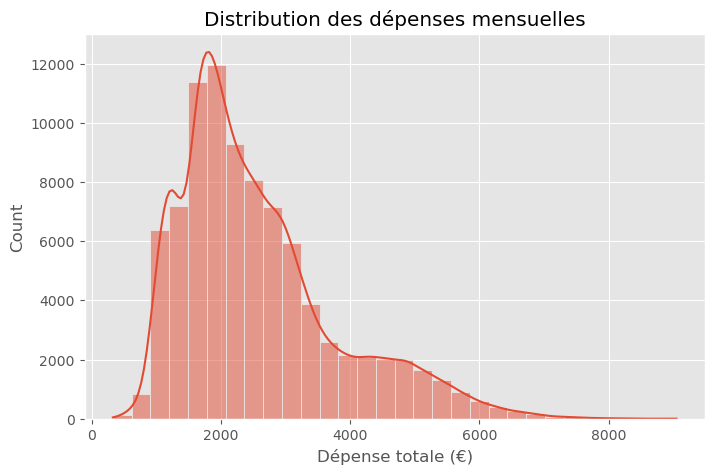

In [11]:
# Distribution des dépenses mensuelles
plt.figure(figsize=(8,5))
sns.histplot(df_ml["depense_totale"], bins=30, kde=True)
plt.title("Distribution des dépenses mensuelles")
plt.xlabel("Dépense totale (€)")
plt.show()

#### Vérification de la cohérence depense_prev et target

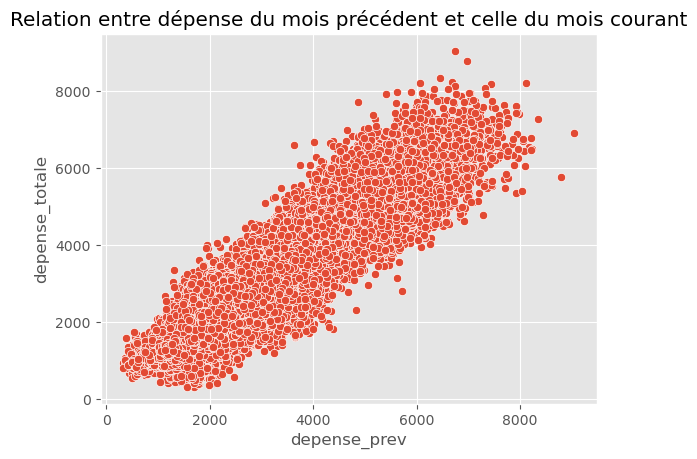

                depense_prev  depense_totale
depense_prev        1.000000        0.937964
depense_totale      0.937964        1.000000


In [13]:
# Vérifier corrélation simple
df_subset = df_ml.dropna(subset=["depense_prev", "depense_totale"])

sns.scatterplot(data=df_subset, x="depense_prev", y="depense_totale")
plt.title("Relation entre dépense du mois précédent et celle du mois courant")
plt.show()

corr = df_subset[["depense_prev", "depense_totale"]].corr()
print(corr)

#### Analyse temporelle globale

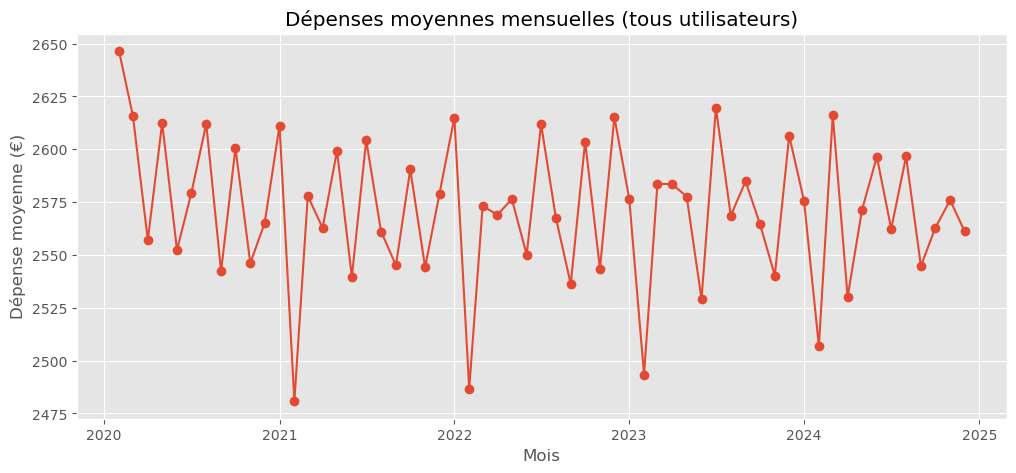

In [14]:
# Analyse temporelle globale
df_ml["mois"] = pd.to_datetime(df_ml["mois"])

dep_temps = df_ml.groupby("mois")["depense_totale"].mean()

plt.figure(figsize=(12,5))
plt.plot(dep_temps.index, dep_temps.values, marker="o")
plt.title("Dépenses moyennes mensuelles (tous utilisateurs)")
plt.xlabel("Mois")
plt.ylabel("Dépense moyenne (€)")
plt.grid(True)
plt.show()

#### Dépenses par profil socio-économique

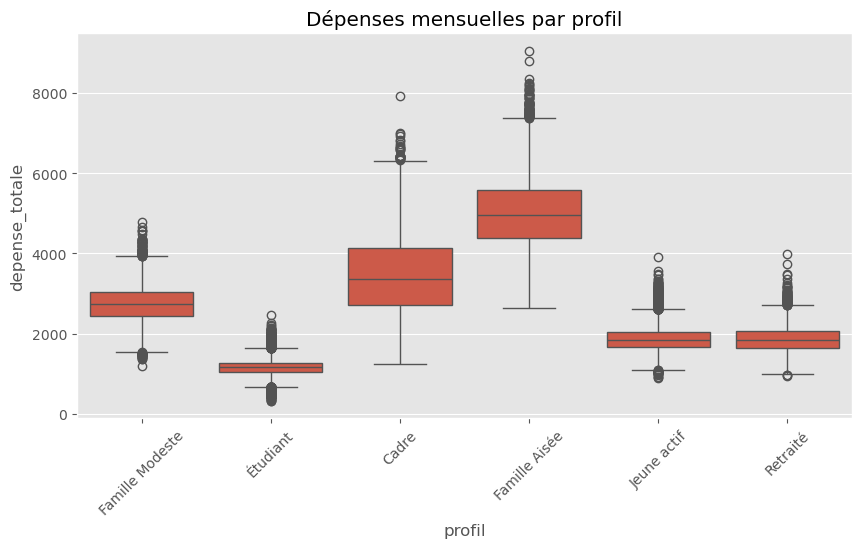

In [15]:
# Dépenses par profil socio-économique
plt.figure(figsize=(10,5))
sns.boxplot(data=df_ml, x="profil", y="depense_totale")
plt.xticks(rotation=45)
plt.title("Dépenses mensuelles par profil")
plt.show()

#### Corrélation des features

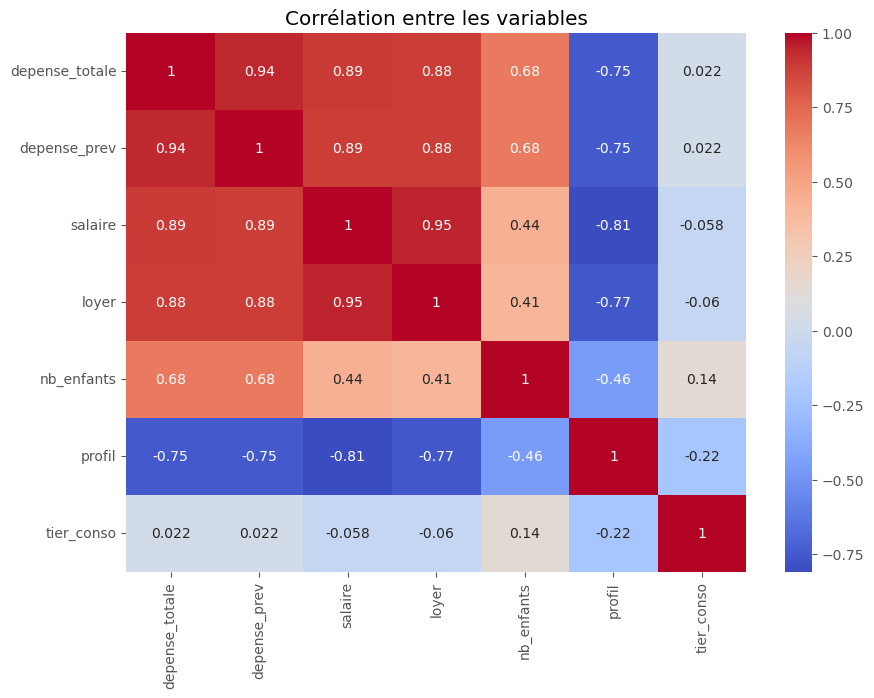

In [16]:
# Encodage simple des variables catégorielles
df_corr = df_ml.copy()

df_corr["profil"] = df_corr["profil"].astype("category").cat.codes
df_corr["tier_conso"] = df_corr["tier_conso"].astype("category").cat.codes

plt.figure(figsize=(10,7))
sns.heatmap(df_corr[["depense_totale","depense_prev","salaire","loyer",
                     "nb_enfants","profil","tier_conso"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Corrélation entre les variables")
plt.show()

#### Visualisation de séries temporelles individuelles

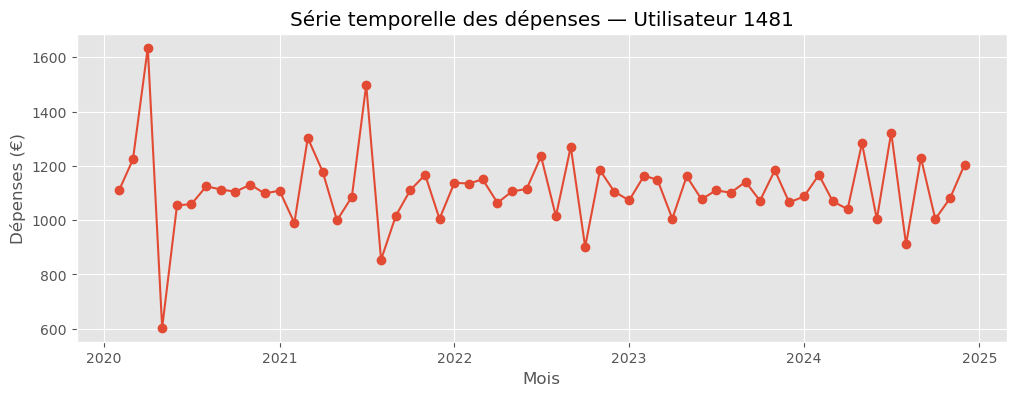

In [17]:
user_sample = np.random.choice(df_ml["user_id"].unique())

subset = df_ml[df_ml["user_id"] == user_sample]

plt.figure(figsize=(12,4))
plt.plot(subset["mois"], subset["depense_totale"], marker="o")
plt.title(f"Série temporelle des dépenses — Utilisateur {user_sample}")
plt.xlabel("Mois")
plt.ylabel("Dépenses (€)")
plt.grid(True)
plt.show()

##### Conclusion automatique de l’EDA

In [18]:
print("\n- Nombre de mois par utilisateur (moy):", mois_par_user.mean())

print("\n- Corrélation depense_prev / depense_totale :")
print(corr, "\n")

print("- Profils disponibles :", df_ml["profil"].unique())
print("- Niveaux de consommation :", df_ml["tier_conso"].unique())



- Nombre de mois par utilisateur (moy): 59.0

- Corrélation depense_prev / depense_totale :
                depense_prev  depense_totale
depense_prev        1.000000        0.937964
depense_totale      0.937964        1.000000 

- Profils disponibles : ['Famille Modeste' 'Étudiant' 'Cadre' 'Famille Aisée' 'Jeune actif'
 'Retraité']
- Niveaux de consommation : ['Standard' 'Eco' 'Premium']
